# Yukawa vs Egs potential

In this notebook I will show a tutorial on how to run Sarkas to compare EGS and Yukawa potential. 
I will run one simulation per potential choice and compute the radial distribution function $g(r)$ and the static structure factor $S(k)$. 

The good thing about Sarkas is that I can put all of this into literally few lines. 

The YAML input file can be found at [input_file](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/Yukawa_vs_EGS/input_files/yukawa_egs_cgs.yaml) and this notebook at [notebook](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/Yukawa_vs_EGS/Yukawa_vs_Exact-Gradient_Corrected_Potential.ipynb).

In [1]:
# Import the usual packages.
%pylab
%matplotlib inline
import os
import pandas as pd

from sarkas.processes import PreProcess, Simulation, PostProcess

# Set the plotting style
plt.style.use('MSUstyle')

# Link to the input file.
input_file = os.path.join('input_files', 'yukawa_egs_cgs.yaml')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# PreProcessing

The first thing to do is to check our simulation parameters. I use this preprocessing mainly to check if my force error is too large. Other would like to check other parameters, e.g. kappa. 

In [2]:
# Run the simulation.
args = {
    "Potential": {"type": 'egs'},
    "IO":   # Store all simulations' data in simulations_dir, 
            # but save the dumps in different subfolders (job_dir) 
        {
            "simulations_dir": 'SMT',
            "job_dir": "{}_pot".format("egs")
#                 "verbose": False # This is so not to print to screen for every run
        },
}

pre = PreProcess(input_file)
pre.setup(read_yaml=True, other_inputs=args)
pre.run(loops=50, postprocessing=True)








     _______.     ___      .______       __  ___      ___           _______.
    /       |    /   \     |   _  \     |  |/  /     /   \         /       |
   |   (----`   /  ^  \    |  |_)  |    |  '  /     /  ^  \       |   (----`
    \   \      /  /_\  \   |      /     |    <     /  /_\  \       \   \    
.----)   |    /  _____  \  |  |\  \----.|  .  \   /  _____  \  .----)   |   
|_______/    /__/     \__\ | _| `._____||__|\__\ /__/     \__\ |_______/    
                                                                            


An open-source pure-python molecular dynamics code for non-ideal plasmas.



* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                      Preprocessing                                       
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

Job ID:  egs_pot
Job directory:  SMT/egs_pot
Equilibration dumps directory:  SMT/eg


Time of a single equilibration step averaged over 50 steps: 
0 min 0 sec 166 msec 738 usec 360 nsec 




Time of a single production step averaged over 50 steps: 
0 min 0 sec 157 msec 298 usec 797 nsec 



----------------------- Total Estimated Times ------------------------ 


Equilibration Time: 0 hrs 13 min 53 sec

Production Time: 0 hrs 52 min 25 sec

Total Run Time: 1 hrs 6 min 19 sec


========================= Filesize Estimates ========================= 


Equilibration:

Checkpoint filesize: 0 GB 0 MB 860 KB 822 bytes
Checkpoint folder size: 0 GB 210 MB 160 KB 700 bytes

Production:

Checkpoint filesize: 0 GB 0 MB 860 KB 822 bytes
Checkpoint folder size: 1 GB 657 MB 261 KB 480 bytes

Total minimum needed space: 1 GB 867 MB 422 KB 156 bytes



* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                      Preprocessing                                       
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


==================== Radial Distribution Functio

## Simulation

This is the most important part of this whole notebook. Notice how I can run the simulation and calculate observables all in one loop. After the definition of the parameters using the ``args`` dictionary. All I need to do is run 3 lines of code for simulation and 3 for postprocessing.


Radial Distribution Function Calculation Time: 0 sec 2 msec 51 usec 255 nsec

Calculating n(k,t) for slice 0/1.



Calculating S(k) ...




Static Structure Factor Calculation Time: 0 sec 232 msec 461 usec 891 nsec

Radial Distribution Function Calculation Time: 0 sec 1 msec 969 usec 546 nsec

Calculating n(k,t) for slice 0/1.



Calculating S(k) ...




Static Structure Factor Calculation Time: 0 sec 24 msec 969 usec 611 nsec


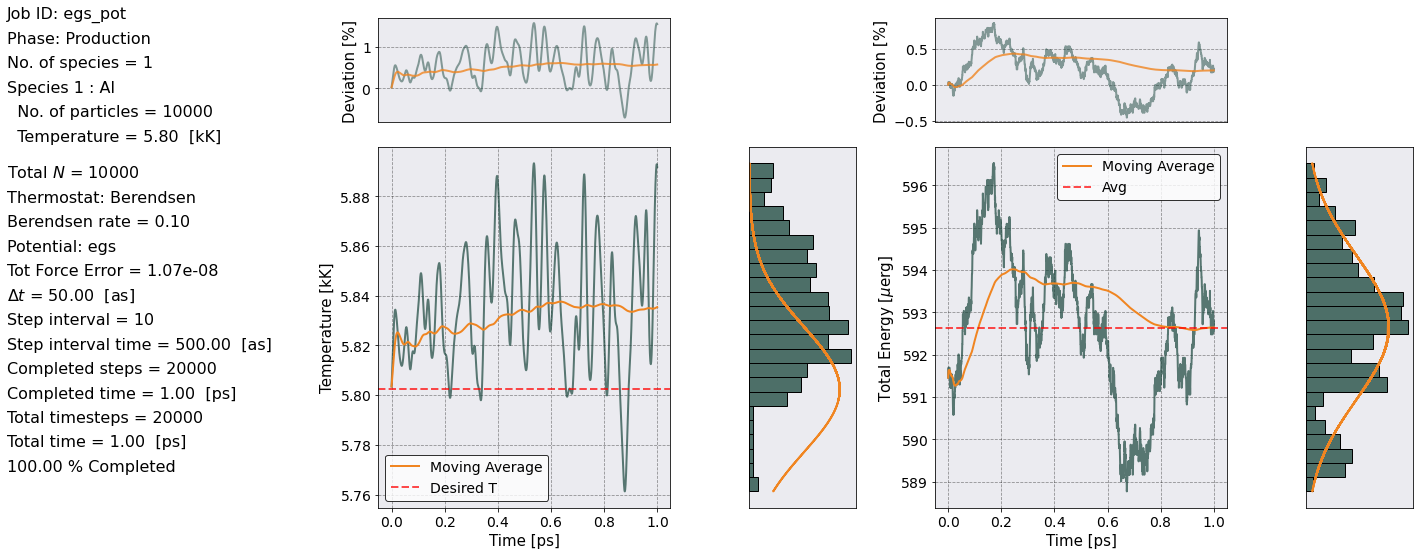

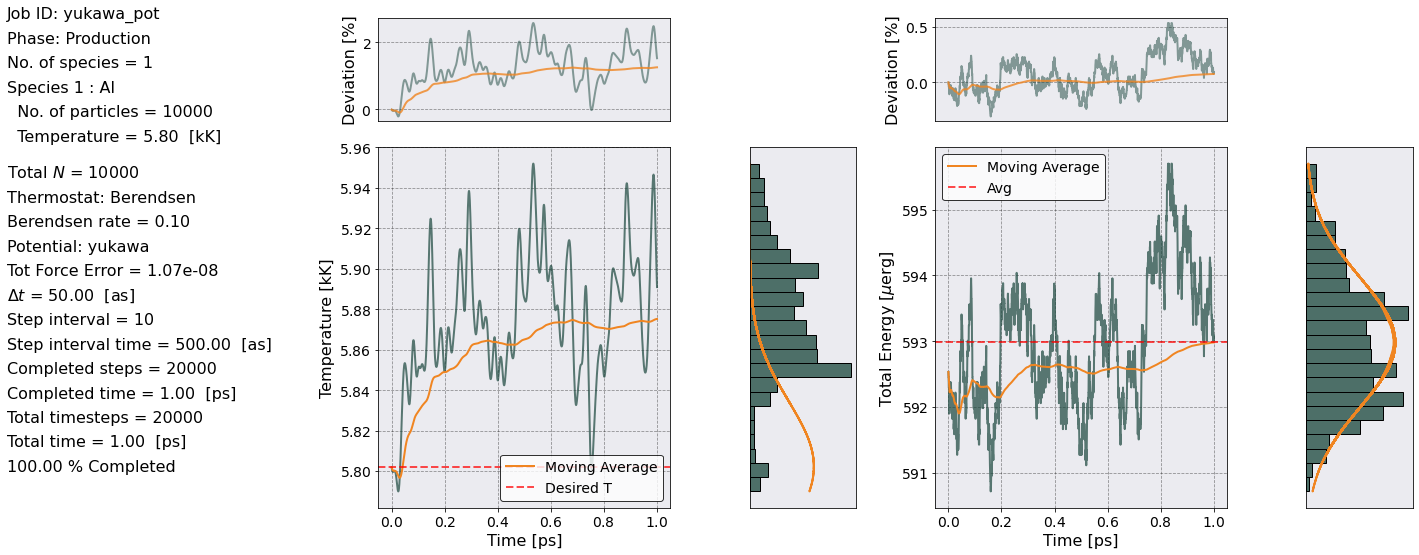

In [3]:
# Define a random number generator
rg = np.random.Generator( np.random.PCG64(154245) )

# Loop over the number of independent MD runs to perform
for i, lbl in zip(range(2), ["egs", "yukawa"]):
    # Get a new seed
    seed = rg.integers(0, 15198)
    
    args = {
        "Parameters": {"rand_seed": seed}, # define a new rand_seed for each simulation
        "Potential": {"type": lbl},
        "IO":   # Store all simulations' data in simulations_dir, 
                # but save the dumps in different subfolders (job_dir) 
            {
                "simulations_dir": 'SMT',
                "job_dir": "{}_pot".format(lbl),
                "verbose": False # This is so not to print to screen for every run
            },
    }
    
    # Run the simulation.
    sim = Simulation(input_file)
    sim.setup(read_yaml=True, other_inputs=args)
    sim.run()
    # Calculate RDF, SSF, Diffusion the simulation.
    pop = PostProcess(input_file)
    pop.setup(read_yaml=True, other_inputs=args)
    pop.parameters.verbose = True     # This is for printing informations about observables, and make plots. 
    # FYI. this will be a little crowded 
    pop.run()


### Radial Distribution Function

[Text(0.5, 0, '$r \\; [ \\AA] $')]

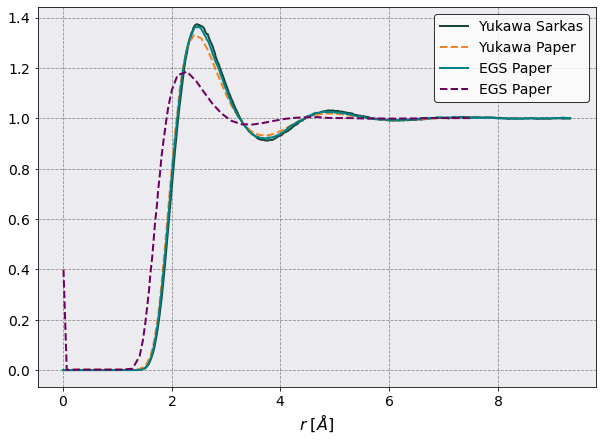

In [6]:
# Here is where I compare the two methods.
egs_data = pd.read_csv('SMT/egs_pot/PostProcessing/RadialDistributionFunction/Production/RadialDistributionFunction_egs_pot.csv', index_col = False)
yukawa_data = pd.read_csv('SMT/yukawa_pot/PostProcessing/RadialDistributionFunction/Production/RadialDistributionFunction_yukawa_pot.csv', index_col = False)

# Paper data
smt_data = np.loadtxt('egs.csv', delimiter=',' )
ysmt_data = np.loadtxt('yukawa.csv', delimiter=',' )

# make the plot
fig, ax = plt.subplots(1,1, figsize=(10,7))

ax.plot(yukawa_data['Distance'] * 1e8, yukawa_data['Al-Al RDF'], label = 'Yukawa Sarkas')
ax.plot(ysmt_data[:,0], ysmt_data[:,1], '--', label = 'Yukawa Paper')

ax.plot(egs_data['Distance'] * 1e8, egs_data['Al-Al RDF'], label = 'EGS Paper')
ax.plot(smt_data[:,0], smt_data[:,1], '--', label = 'EGS Paper')

ax.legend()
ax.set( xlabel = r'$r \; [ \AA] $')

### Static Structure Function

[Text(0.5, 0, '$ka$')]

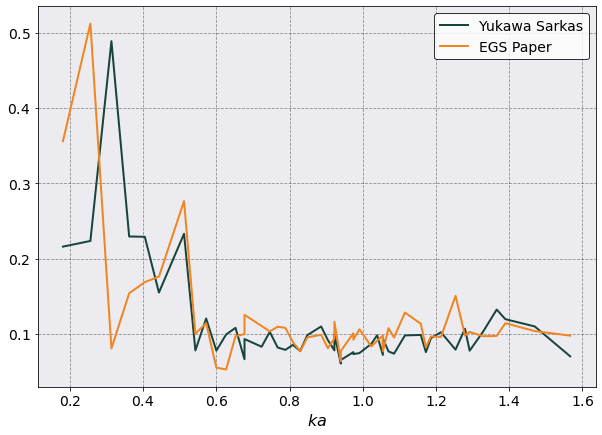

In [8]:
# Here is where I compare the two methods.
egs_data = pd.read_csv('SMT/egs_pot/PostProcessing/StaticStructureFunction/Production/StaticStructureFunction_egs_pot.csv', index_col=False)
yukawa_data = pd.read_csv('SMT/yukawa_pot/PostProcessing/StaticStructureFunction/Production/StaticStructureFunction_yukawa_pot.csv', index_col=False)

# Paper data
# smt_data = np.loadtxt('egs.csv', delimiter=',' )
# ysmt_data = np.loadtxt('yukawa.csv', delimiter=',' )

# make the plot
fig, ax = plt.subplots(1,1, figsize=(10,7))

ax.plot(yukawa_data['ka values'] , yukawa_data['Al-Al SSF'], label = 'Yukawa Sarkas')
# ax.plot(ysmt_data[:,0], ysmt_data[:,1], '--', label = 'Yukawa Paper')

ax.plot(egs_data['ka values'] , egs_data['Al-Al SSF'], label = 'EGS Paper')
# ax.plot(smt_data[:,0], smt_data[:,1], '--', label = 'EGS Paper')

ax.legend()
ax.set( xlabel = r'$ka$')